

# Project: Investigate a Dataset (no-show appointments Dataset investigation!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The no-show dataset provides information about patients making appointments in a hospital which shows if the patients have been 
missing their appointments or not.

> And in this project I investigate the factors that affect the patines who have been showed or not to their Scheduled appointments
like for example if the gender plays a rule in who is more committed to their appointment, and at which age are likely to miss them? 
and exploring the data and find answers.

In [84]:
#importing the needed library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [85]:
#load the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [86]:
df.shape

(110527, 14)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [88]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [89]:
# check fo duplicated data
df.duplicated().sum()

0

In [90]:
# check for the null value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### Data Cleaning (Replace this with more specific notes!)

in the below step I dropped the columns that I don't need in my investigation

In [91]:
# Drop the columns that i'm not going to use to investigate
df.drop(['PatientId','AppointmentID','Neighbourhood','Scholarship'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,1,1,0,0,0,No


In this step, I rename the column No-show according to python variables soi can use it.

In [92]:
# rename the No-show columns
df.rename(columns={'No-show':'no_show'}, 
                 inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,1,1,0,0,0,No


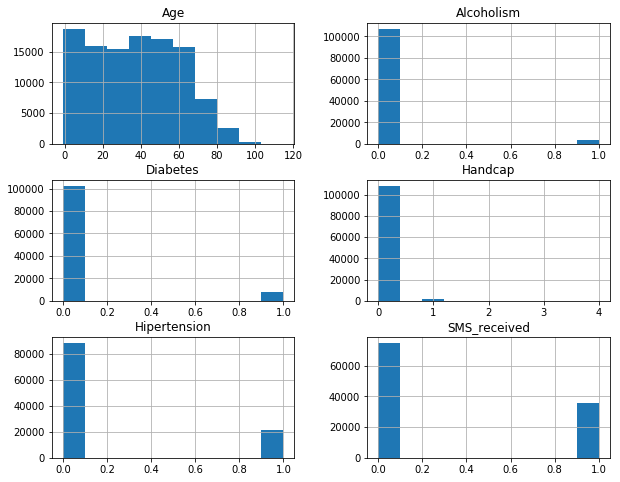

In [93]:
#visulasing the features
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (The Age factor!)

the step below to show how many people have shown or not to their appointment

In [94]:
#count how much people showed or not
no_show = df["no_show"].value_counts()
print(no_show)

No     88208
Yes    22319
Name: no_show, dtype: int64


i'm converting yes and no to 0's and 1's so i can use the value

In [95]:
# convertin yes and no with 0's and 1's
df['no_show'].replace("No",0,inplace=True)
df['no_show'].replace("Yes",1,inplace=True)

Text(0,0.5,'Patients')

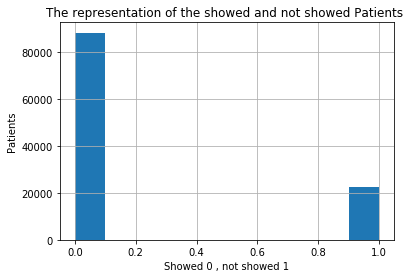

In [96]:
df.no_show.hist()
plt.title('The representation of the showed and not showed Patients ')
plt.xlabel('Showed 0 , not showed 1')
plt.ylabel('Patients')

In [97]:
# swap the vlues 
showed = df.no_show == False
NOTshowed = df.no_show == True

df['showed'] = showed
df['NOTshowed'] = NOTshowed

In [98]:
#calculating the mean of how many people showed and not
mean1 = showed.mean()
mean2 = NOTshowed.mean()

print("The mean of people who showed :",mean1)
print("The mean of people who Not showed :",mean2)

The mean of people who showed : 0.798067440534892
The mean of people who Not showed : 0.20193255946510807


In [99]:
df.Age[showed].mean()

37.790064393252315

In [100]:
df.Age[NOTshowed].mean()

34.31766656212196

In [101]:
#finding the max and min
max_age_showed = df.Age[showed].max()
min_age_showed= df.Age[showed].min()
print('max age showed:',max_age_showed,
      'min age showed:',min_age_showed )

max age showed: 115 min age showed: -1


it seems that not possible that -1 is a real value so i'm going to keep the age between 0 and 115

In [102]:
# keeping the avrege age between 0 and 115
df = df[(df.Age >= 0) & (df.Age <= 115)]

In [103]:
#finding the max and min
max_age_notShowed = df.Age[NOTshowed].max()
min_age_notShowed= df.Age[NOTshowed].min()
print('max age showed:',max_age_notShowed,
      'min age showed:',min_age_notShowed )

max age showed: 115 min age showed: 0


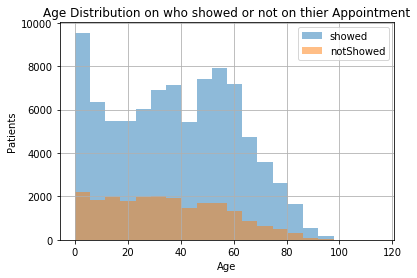

In [104]:
# visualising the Age Distrubtion of who showed or not
df.Age[showed].hist(alpha=0.5,bins=20,label='showed')
df.Age[NOTshowed].hist(alpha=0.5,bins=20,label='notShowed')
plt.title('Age Distribution on who showed or not on thier Appointment')
plt.xlabel('Age')
plt.ylabel('Patients')
plt.legend();

As it's shown above the graph skewed to the right and shows the Age Distribution among the period
And the mean average of people they have been attending and missing their appointment at the same time 
seems to be at the same level between 34 and 37.

In [105]:
df.groupby('no_show').Age.mean()

no_show
0    37.790504
1    34.317667
Name: Age, dtype: float64

### Research Question 2  (The gender factor!)

is female more likely to show or male?

In [106]:
# the count of the female and male
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [107]:
# counting the showed Patients 
df.Gender[showed].value_counts()

F    57245
M    30962
Name: Gender, dtype: int64

In [108]:
#counting not showed Patients 
df.Gender[NOTshowed].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [109]:
# finding the mean
df.groupby('Gender').showed.mean()

Gender
F    0.796851
M    0.800321
Name: showed, dtype: float64

In [110]:
df.groupby('Gender').NOTshowed.mean()

Gender
F    0.203149
M    0.199679
Name: NOTshowed, dtype: float64

In [111]:
# replace with 0's and 1's
df['Gender'].replace("M", 0,inplace=True)
df['Gender'].replace("F", 1,inplace=True)

In [112]:
female = df.Gender == True
male = df.Gender == False

Gender
0    0.800321
1    0.796851
Name: showed, dtype: float64


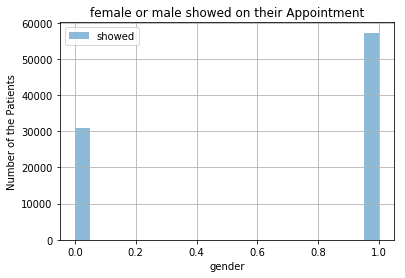

In [113]:
# visualise the male anf female who have been to thier Appointment
df.Gender[showed].hist(alpha=0.5,bins=20,label='showed')
plt.title('female or male showed on their Appointment')
plt.xlabel('gender')
plt.ylabel('Number of the Patients')
plt.legend();
gender_showed = df.groupby('Gender').showed.mean()
print(gender_showed)

the graph above shows the number of the showed Patients if it's a female that represented by 1 
or a male that represented by 0 

Gender
0    0.199679
1    0.203149
Name: NOTshowed, dtype: float64


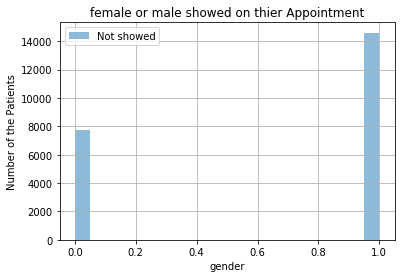

In [114]:
# visualise the male anf female who have not been to thier Appointment
df.Gender[NOTshowed].hist(alpha=0.5,bins=20,label='Not showed')
plt.title('female or male showed on thier Appointment')
plt.xlabel('gender')
plt.ylabel('Number of the Patients')
plt.legend();
gender_notShowed = df.groupby('Gender').NOTshowed.mean()
print(gender_notShowed)

the graph above shows the number of the No-showed Patients if it's a female that represented by 1 
or a male that represented by 0 

### Research Question 3  (Hipertension	,Diabetes,	Alcoholism!)

The loop below count the amont of patients with such Hipertension or Diabetes or Alcoholism and outputs the show and no-show rate, and it seems the patients with Hipertension and Diabetes have close rate of show and no-show.

In [115]:
# calculating the mean of each of these factor
factors = ['Hipertension','Diabetes','Alcoholism']
for x in factors :
    print(df.groupby(x)['showed'].mean())
    print(df.groupby(x)['NOTshowed'].mean())

Hipertension
0    0.790961
1    0.826980
Name: showed, dtype: float64
Hipertension
0    0.209039
1    0.173020
Name: NOTshowed, dtype: float64
Diabetes
0    0.796370
1    0.819967
Name: showed, dtype: float64
Diabetes
0    0.203630
1    0.180033
Name: NOTshowed, dtype: float64
Alcoholism
0    0.798052
1    0.798512
Name: showed, dtype: float64
Alcoholism
0    0.201948
1    0.201488
Name: NOTshowed, dtype: float64


Diabetes
0    0.796370
1    0.819967
Name: showed, dtype: float64


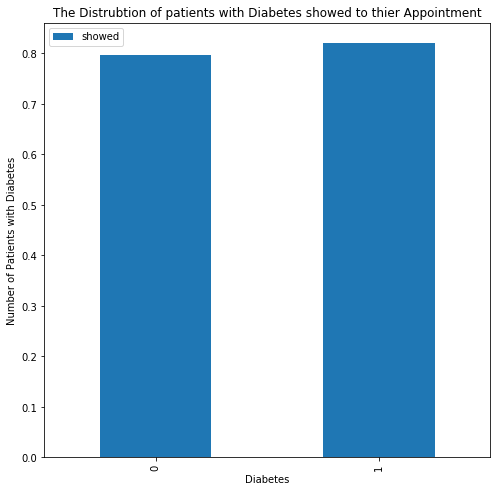

In [116]:
# visualise Patients with Diabetes that showed
df.groupby('Diabetes').showed.mean().plot(kind='bar',figsize=(8,8));
plt.xlabel("Diabetes")
plt.ylabel("Number of Patients with Diabetes")
plt.title("The Distrubtion of patients with Diabetes showed to thier Appointment")
plt.legend()
p_Diabetes = df.groupby('Diabetes').showed.mean()
print(p_Diabetes)

the graph above is a representation of Patients with Diabetes , 1 is represented Patients with Diabete and 0 not.

In [117]:
# Patients that have been recieved Sms and showed
df.groupby('SMS_received').showed.mean()

SMS_received
0    0.832965
1    0.724255
Name: showed, dtype: float64

The percentage of the Patients have showed and received a SMS is about 72% 
and the Patients showed and havn't received SMS is about 83%

In [118]:
# Patients that have been recieved Sms and not showed
df.groupby('SMS_received').NOTshowed.mean()

SMS_received
0    0.167035
1    0.275745
Name: NOTshowed, dtype: float64

The percentage of the Patients have NOTshowed and received a SMS is about 28%
and the Patients NOTshowed and havn't received SMS is about 17%

<a id='Limitationss'></a>
## Limitations

I believe the Limitations of this dataset was that the condition of missing the appointment and the reasons for not show to predict future absence.

<a id='conclusions'></a>
## Conclusions

1. the average age of people who have been showed and not are close
2. the gender doesn't effect the attending to the Appointment
3. and seems that the SMS not helpful, people still miss the Appointment
4. the percentage of people with Diabetes and Hypertension who have been shown seem close.


In [119]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0